In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3]

# Task 1

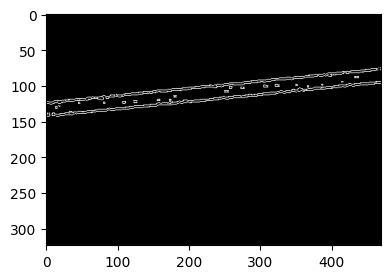

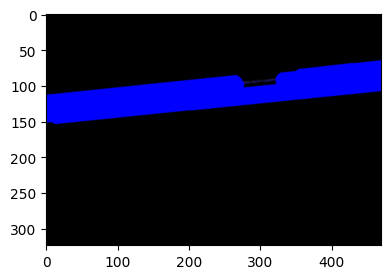

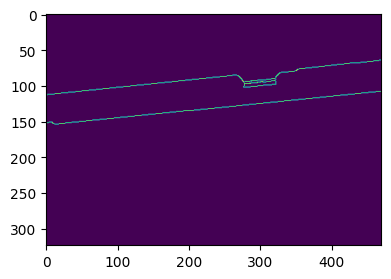

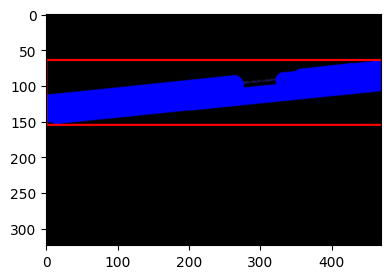

In [195]:
img = cv2.imread('./Task1-assets/3.jpeg')

#extracting red only from the image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
# define range of red color in HSV
lower_red = np.array([160,50,50])
upper_red = np.array([180,255,255])

extracted_img = cv2.inRange(hsv, lower_red, upper_red)
masked_img= cv2.bitwise_and(img, img, mask=extracted_img)

img1= masked_img
img2 = masked_img
img1 = cv2.GaussianBlur(img1, (3,3),10)

gray = cv2.cvtColor(img1, cv2.COLOR_HSV2BGR)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gray, 2, 1)
plt.imshow(canny, cmap='gray')
plt.show()
linesP=None
# Probabilistic HoughLine Transform to detect lines
linesP = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 50, 10)
if linesP is not None:
 for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(img1, (l[0], l[1]), (l[2], l[3]), (0,0,255), 20, cv2.LINE_AA)

plt.imshow(img1)
plt.show()

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gray, 50, 100)
plt.imshow(canny)
plt.show()

contours, hierarchy = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create masks
try: hierarchy = hierarchy[0]
except: hierarchy = []

height, width = canny.shape
min_x, min_y = width, height
max_x = max_y = 0

# computes the bounding box for the contour, and draws it on the frame
for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    if w > 20 and h > 50:
        cv2.rectangle(img1, (x,y), (x+w,y+h), (255, 0, 0), 2)

if max_x - min_x > 0 and max_y - min_y > 0:
    cv2.rectangle(img1, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

plt.imshow(img1)
plt.show()
